In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

import tensorflow as tf
from tensorflow import keras 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from datetime import datetime

import pprint

# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import TensorBoard


creating network model using gpu 0


2) Here, we have the network model class definition. In this class, the most important function is the one called **create_model()**. As defined in the exercises section, your task is to update the network architecture defined in this function such that the network will return the highest accuracy for the given training, validation, and testing data.

In [23]:
class ClassifierDNNModel():
    def __init__(self, num_classes=10, batch_size=32, inputShape=(64,64,3), dropout_prob=0.25):
        # super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.batch_size = batch_size
        self.inputShape = inputShape
        self.dropout_prob = dropout_prob
    
    def create_model(self):
        model = Sequential()

        chanDim = -1
        # CONV => RELU => POOL
        model.add(Conv2D(25, (3, 3), padding="same",
                         input_shape=self.inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3, 3)))
        

        #2 (CONV => RELU) * 2 => POOL
        model.add(Conv2D(50, (3, 3), padding="same"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        
        #3 (CONV => RELU) * 2 => POOL
        model.add(Conv2D(100, (3, 3), padding="same"))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(2048))
        model.add(BatchNormalization())
        model.add(Activation("relu"))
        model.add(Dropout(0.25))
        

        # softmax classifier
        model.add(Dense(self.num_classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model
    def display_activation(self, activations, col_size, row_size, act_index):
        activation = activations[act_index]
        activation_index = 0
        fig, ax = plt.subplots(row_size, col_size, figsize=(row_size * 2.5, col_size * 1.5))
        fig.suptitle("activations in layer " + str(act_index+1))

        for row in range(0, row_size):
            for col in range(0, col_size):
                ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
                activation_index += 1
        plt.show()

In [26]:
# setup data
if cfg.DATA_AUGMENTATION:
    print("Data is being augmented!")
    aug_parameters = ImageDataGenerator(
        zoom_range=0.1, # randomly zoom into images
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
else:
    print("Data will not be augmented!")
    aug_parameters = ImageDataGenerator(
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


Data is being augmented!


In [29]:
#opt = tf.optimizers.Adam(cfg.LEARNING_RATE)
opt = tf.optimizers.SGD(0.05)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= opt, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 25)      700       
_________________________________________________________________
activation_10 (Activation)   (None, 128, 128, 25)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 25)      100       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 42, 42, 25)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 50)        11300     
_________________________________________________________________
batch_normalization_9 (Batch (None, 42, 42, 50)        200       
_________________________________________________________________
activation_11 (Activation)   (None, 42, 42, 50)       

10) We can now feed the training and validation data to the network. This will train the network for **some epochs**. Note that the epoch number is also predefined in the file called **configClassifier.py.**

In [30]:
history = model.fit(aug_train_batch_generator,
          #epochs=cfg.NUM_EPOCHS,
          epochs = 10,       
          verbose=1,
          steps_per_epoch=(nbr_train_data//cfg.BATCH_SIZE), # total batch number
          validation_steps=(nbr_valid_data // cfg.BATCH_SIZE), # total batch number
          validation_data=aug_valid_batch_generator,
          callbacks=[TensorBoard(log_dir="logs/{}".format(datetime.now().strftime("%Y%m%d-%H%M%S")), write_graph=True, write_images=False,
                                 histogram_freq=0)])


Epoch 1/10
338/338 [==============================] - 65s 191ms/step - loss: 2.0676 - accuracy: 0.3640 - val_loss: 1.9332 - val_accuracy: 0.2518
Epoch 2/10
338/338 [==============================] - 65s 191ms/step - loss: 1.3894 - accuracy: 0.5174 - val_loss: 2.0970 - val_accuracy: 0.3205
Epoch 3/10
338/338 [==============================] - 66s 195ms/step - loss: 0.9621 - accuracy: 0.6536 - val_loss: 1.8418 - val_accuracy: 0.4589
Epoch 4/10
338/338 [==============================] - 65s 192ms/step - loss: 0.6155 - accuracy: 0.7783 - val_loss: 1.5614 - val_accuracy: 0.5469
Epoch 5/10
338/338 [==============================] - 65s 194ms/step - loss: 0.4320 - accuracy: 0.8473 - val_loss: 1.0736 - val_accuracy: 0.6812
Epoch 6/10
338/338 [==============================] - 66s 196ms/step - loss: 0.3266 - accuracy: 0.8800 - val_loss: 2.3615 - val_accuracy: 0.4862
Epoch 7/10
338/338 [==============================] - 65s 193ms/step - loss: 0.2379 - accuracy: 0.9136 - val_loss: 0.8448 - val_ac

11) We can test the model with the test data

In [31]:
# testing model
test_result = model.evaluate(test_batch_generator,
                                       steps=(nbr_test_data//cfg.BATCH_SIZE))
test_loss = round(test_result[0], 4)
test_acc = round(test_result[1], 4)
print("Test Loss: ", str(test_loss), "Test Accuracy: ", str(test_acc))

69/69 [==============================] - 6s 86ms/step - loss: 0.6457 - accuracy: 0.7831
Test Loss:  0.6457 Test Accuracy:  0.7831


12) We can plot a confusion matrix showing **the class-wise accuracies**

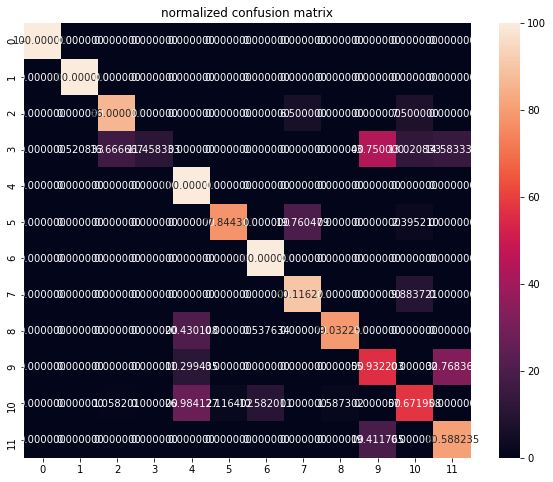

In [32]:
true_classes = []
pred_classes = []
for i in range(0, nbr_test_data//cfg.BATCH_SIZE +1):
    t_data, t_label = next(test_batch_generator)
    pred_labels = model.predict(t_data, batch_size=cfg.BATCH_SIZE)
    pred_classes.extend(np.argmax(pred_labels, axis=1))
    true_classes.extend(np.argmax(t_label, axis=1))
#print (" true classes: " + str(len(true_classes))  + " pred classes: " + str(len(pred_classes)))
confusion_mtx = confusion_matrix(np.array(true_classes), np.array(pred_classes))
plt.figure(figsize=(10, 8))
plt.title("normalized confusion matrix")
norm_confusion_mtx = 100* confusion_mtx.astype('float') / confusion_mtx.sum(axis=1)[:, np.newaxis]
sns.heatmap(norm_confusion_mtx, annot=True, fmt="f")
plt.show()

13) We can also show sample classification results

In [ ]:
t_data, t_label = next(test_batch_generator)
print(t_data[0].shape)
plt.imshow(t_data[0])
pred_labels = model.predict(t_data, batch_size=cfg.BATCH_SIZE)
plot_sample_classification_results(t_data, t_label, cfg.CLASSES, pred_labels, test_acc)

14) Finally, we can visualize CNN layer activations for a given sample input 

In [ ]:
# Visualize CNN Layers
t_data, t_label = next(test_batch_generator)
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(t_data[10].reshape(1, cfg.IMAGE_HEIGHT, cfg.IMAGE_WIDTH, cfg.IMAGE_CHANNEL))

plt.imshow(t_data[10])
plt.title("sample input for the activation test")
modelObj.display_activation(activations, 4, 4, 1) # Displaying output of layer 2
modelObj.display_activation(activations, 4, 4, 3) # Displaying output of layer 4
modelObj.display_activation(activations, 4, 4, 4) # Displaying output of layer 5